In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import *
from keras.layers.wrappers import *
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger, EarlyStopping
import keras.backend.tensorflow_backend as ktf

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['grid.color'] = (.7, .7, .7, 0)
plt.rcParams['figure.figsize'] = (16, 10)

print('numpy ver.: ' + numpy.__version__)
print('pandas ver.: ' + pandas.__version__)
print('tensorflow ver.: ' + tf.__version__) 
print('keras ver.: ' + keras.__version__)
#データ読み込み
# dataframe = pandas.read_csv('8708_clean.csv', engine='python', usecols=['DiaUnitMark','TravelTime'])
dataframe = pandas.read_csv('8708_clean.csv', engine='python', usecols=['TravelTime'])

Using TensorFlow backend.


numpy ver.: 1.19.1
pandas ver.: 1.1.2
tensorflow ver.: 2.1.0
keras ver.: 2.3.1


In [4]:
dataframe.head(2)

,TravelTime
0,282
1,144


In [3]:
dataframe.tail(3)

,DiaUnitMark,TravelTime
83806,3,114
83807,3,193
83808,3,0


In [4]:
dataframe1 = dataframe.loc[(dataframe['DiaUnitMark'].isin(['2']))]
dataframe1 = dataframe1['TravelTime']

In [2]:
labelset = dataframe['TravelTime']
labelset = labelset.values
labelset = labelset.astype('float64')
labelset = labelset.reshape(-1,1)

dataset = dataframe.values
dataset = dataset.astype('float64')

stopnumber = 19
print(dataset.shape,labelset.shape)

(111777, 1) (111777, 1)


In [3]:
# split into train and test sets
train_size = int((((len(dataset)//stopnumber) * 0.9988)//1) * stopnumber)
test_size = len(dataset) - train_size

train9 = dataset[0:27531,:]
train10 = dataset[27702:56506,:]
train11 = dataset[56734:83695,:]
train12 = dataset[83790:111473,:]
train = numpy.vstack((train9,train10))
train = numpy.vstack((train,train11))
train = numpy.vstack((train,train12))
# train_label = train[:,0]
# train_label = train_label.reshape(-1,1)

test9 = dataset[27531:27702,:]
test10 = dataset[56506:56734,:]
test11 = dataset[83695:83790,:]
test12 = dataset[111473:len(dataset),:]
test = numpy.vstack((test9,test10))
test = numpy.vstack((test,test11))
test = numpy.vstack((test,test12))
# test_label = test[:,0]
# test_label = test_label.reshape(-1,1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
# testAC = scaler.fit_transform(datasetAC)
# testPC = scaler.fit_transform(datasetPC)


train_fit = scaler.fit_transform(train)
test_fit = scaler.fit_transform(test)
# train_label_fit = scaler.fit_transform(train_label)
# test_label_fit = scaler.fit_transform(test_label)

# test001 = datasetNor[train_size-19:len(datasetNor)-19,:]
# train_size002 = int((((len(dataset)//stopnumber) * 0.77)//1) * stopnumber)
# test002 = datasetNor[train_size-19:len(datasetNor)-19,:]
# print(len(test001))
print(train_size,test_size)
print(train_fit.shape)
print(test_fit.shape)
# print(train_label_fit.shape)
# print(test_label_fit.shape)

111625 152
(110979, 1)
(798, 1)


In [4]:
a = ((len(train)-1)//stopnumber)-look_back-1
print(a)

NameError: name 'look_back' is not defined

In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)//stopnumber):
        for j in range(stopnumber-look_back-1):
            dataY.append(dataset[(i*stopnumber + j+look_back), 0])
            xset = []
            for k in range(dataset.shape[1]):
                a = dataset[(i*stopnumber + j):(i*stopnumber + j+look_back), k]
                xset.append(a)
            dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

look_back = 4
trainX, trainLabel = create_dataset(train_fit, look_back)
testX, testLabel = create_dataset(test_fit, look_back)
print(trainX.shape, trainLabel.shape)
print(testX.shape, testLabel.shape)
print(testX[0:2], testLabel[0])

(81774, 1, 4) (81774,)
(588, 1, 4) (588,)
[[[0.46065259 0.31861804 0.1074856  0.53166987]]

 [[0.31861804 0.1074856  0.53166987 0.20153551]]] 0.20153550863723607


In [5]:
trainXreshape = trainX.transpose((0,2,1))
testXreshape = testX.transpose((0,2,1))

In [6]:
# train_s = numpy.squeeze(train_s)
# train_label_s = numpy.squeeze(train_label_s)
# test_s = numpy.squeeze(test_s)
# test_label_s = numpy.squeeze(test_label_s)

# train_vstack = train_s[:,:,0]
# train_label_hstack = train_label_s[:,0]

# test_vstack = test_s[:,:,0]
# test_label_hstack = test_label_s[:,0]

# def stack(input_s,input_label_s,input_vstack,input_label_hstack):
#     for i in range(1, 18):    
#         input_s_n = input_s[:,:,i]
#         input_label_s_n = input_label_s[:,i]
    
#         input_vstack = numpy.vstack((input_vstack,input_s_n))
#         input_label_hstack = numpy.hstack((input_label_hstack,input_label_s_n))
#     return input_vstack, input_label_hstack

# train_vstack, train_label_hstack = stack(train_s, train_label_s, train_vstack, train_label_hstack)
# test_vstack, test_label_hstack = stack(test_s, test_label_s, test_vstack, test_label_hstack)

# print('--------------')
# print(train_vstack.shape)
# print(train_label_hstack.shape)
# print('--------------')
# print(test_vstack.shape)
# print(test_label_hstack.shape)
# trainXreshape = train_vstack.reshape(train_vstack.shape[0], train_vstack.shape[1], 1)
# testXreshape = test_vstack.reshape(test_vstack.shape[0], test_vstack.shape[1], 1)
# trainLabelReshape = train_label_hstack.reshape(train_label_hstack.shape[0], 1)
# testLabelReshape = test_label_hstack.reshape(test_label_hstack.shape[0], 1)
# print(trainXreshape.shape, trainLabelReshape.shape)
# print(testXreshape.shape, testLabelReshape.shape)

In [6]:
trainLabelReshape = trainLabel.reshape(trainLabel.shape[0], 1)
testLabelReshape = testLabel.reshape(testLabel.shape[0], 1)
print(trainXreshape.shape, trainLabelReshape.shape)
print(testXreshape.shape, testLabelReshape.shape)

(81774, 4, 1) (81774, 1)
(588, 4, 1) (588, 1)


In [10]:
model = Sequential()
# model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (look_back, 1)))
# model.add(LSTM(name ='lstm_1',
#                 units = 64,
#                 return_sequences = True))
    
# model.add(Dropout(0.2, name = 'dropout_1'))
# model.add(BatchNormalization(name = 'batch_norm_1'))

model.add(LSTM(name ='lstm_2',
               units = 64,
               input_shape = (look_back, 1),
               return_sequences = False))

model.add(Dropout(0.1, name = 'dropout_2'))
model.add(BatchNormalization(name = 'batch_norm_2'))

model.add(Dense(units=1, name = 'dense_1', activation = 'tanh'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mape'])
# model.fit(trainXreshape, trainLabelReshape, epochs=100, batch_size=32, verbose=1)
model.summary()

model.fit(trainXreshape, trainLabelReshape, epochs=50, shuffle=True, validation_split=0.1, batch_size=64, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,217
Trainable params: 17,089
Non-trainable params: 128
_________________________________________________________________
Train on 52569 samples, validate on 5841 samples
Epoch 1/50
52569/52569 [==============================] - 7s 137us/step - loss: 0.0080 - mae: 0.0704 - mape: 64.1225 - val_loss: 0.0064 - val_mae: 0.0623 - val_mape: 53.1177
Epoch 2/50
52569/52569 

In [21]:
model.save('LSTM-newdata.h5')
# model.save('C:/Users/kinkr/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/lstm/LSTM-withStopInfo-ver01-Y-U.h5')

In [10]:
model = tf.keras.models.load_model('LSTM_8708_ver02-Aonly.h5')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 4)              96        
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [11]:
testPredict = model.predict(testXreshape)

In [12]:
print(testPredict.shape, testLabelReshape.shape)

(420, 1) (420, 1)


In [13]:
testPredict_inv = scaler.inverse_transform(testPredict)
testLabelReshape_inv = scaler.inverse_transform(testLabelReshape)

In [47]:
print(testPredict_inv[0:18])
print(testLabelReshape_inv[0:18])
# numpy.savetxt("testPredict_Aonly.txt",testPredict_inv)
# numpy.savetxt("testLabel_Aonly.txt",testLabelReshape_inv)

[[ 82.48207 ]
 [ 44.802364]
 [ 57.291588]
 [ 40.601963]
 [ 68.887474]
 [ 40.859467]
 [117.36916 ]
 [ 71.203896]
 [109.71847 ]
 [201.71295 ]
 [ 85.29125 ]
 [ 46.76767 ]
 [ 56.319283]
 [ 37.30484 ]
 [ 78.52038 ]
 [ 40.988537]
 [124.54015 ]
 [ 68.55553 ]]
[[ 77.]
 [ 29.]
 [ 80.]
 [ 40.]
 [110.]
 [ 27.]
 [184.]
 [ 78.]
 [133.]
 [206.]
 [ 89.]
 [ 32.]
 [ 75.]
 [ 62.]
 [ 96.]
 [ 28.]
 [ 74.]
 [ 30.]]


In [14]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    return np.mean(np.abs((y_true - y_pred)/y_true))

t = mean_absolute_percentage_error(testPredict_inv[:,0], testLabelReshape_inv[:,0])
print(t)

0.2500688878010068


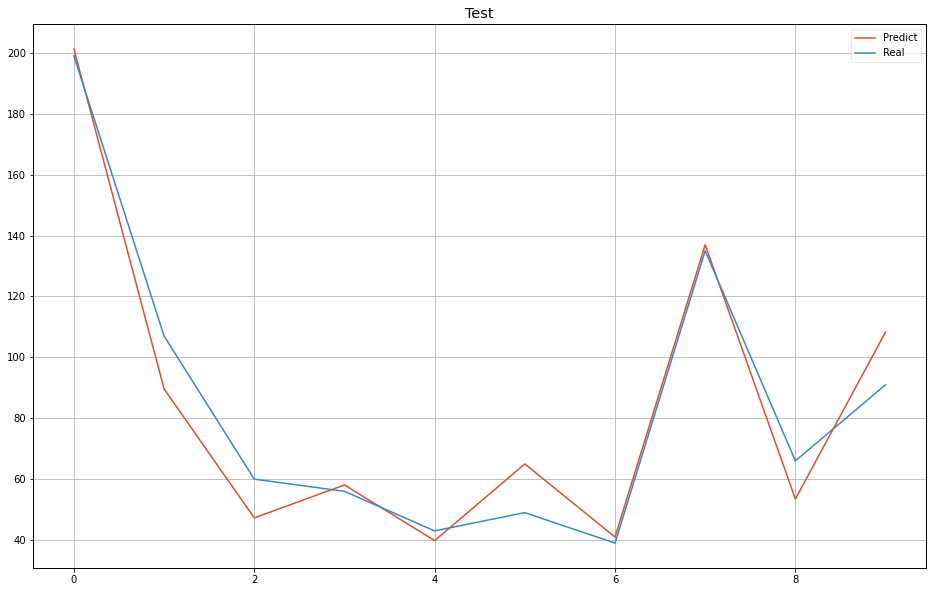

In [15]:
t=9
plt.plot(range(stopnumber-look_back-1), testPredict_inv[0+11*t:stopnumber-look_back-1+11*t,0], label='Predict')
plt.plot(range(stopnumber-look_back-1), testLabelReshape_inv[0+11*t:stopnumber-look_back-1+11*t,0], label='Real')
plt.title('Test')

plt.legend() 

# plt.savefig("C:/Users/Hailin/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/Conv-LSTM/ConvLSTM-verson04-lati.svg", format="svg")
plt.show()

In [63]:
dataframe.head(3)

,TravelTime
0,282
1,144
2,60


In [58]:
df1 = dataframe[dataframe['DateKind'] == 1] 
df2 = dataframe[dataframe['DateKind'] == 2] 
df3 = dataframe[dataframe['DateKind'] == 3] 

In [59]:
dataset1 = df1.values
dataset1 = dataset1.astype('float64')
dataset2 = df2.values
dataset2 = dataset2.astype('float64')
dataset3 = df3.values
dataset3 = dataset3.astype('float64')

In [61]:
def average_date(dataset, df):
    average = []
    for i in range(26):
        a = 0.0
        for j in range(len(dataset)//26):
            a = a + df1.iloc[(j*26 + i), 10]
        average.append(a/(len(dataset)//26))
    average = numpy.array(average)
    average_reshape = average.reshape(-1 ,1)
    return average_reshape

In [62]:
average1 = average_date(dataset1, df1)
average2 = average_date(dataset2, df2)
average3 = average_date(dataset3, df3)

In [63]:
print(average1.shape)

(26, 1)


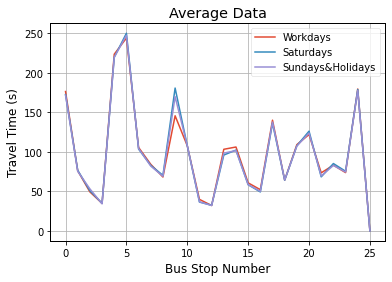

In [75]:
plt.plot(range(26), average1[0:26,0], label='Workdays')
plt.plot(range(26), average2[0:26,0], label='Saturdays')
plt.plot(range(26), average3[0:26,0], label='Sundays&Holidays')

plt.title('Average Data')
plt.xlabel('Bus Stop Number')
plt.ylabel('Travel Time (s)')
plt.legend() 

plt.savefig("Pictures/2605_AverageData.svg", format="svg")
plt.show()

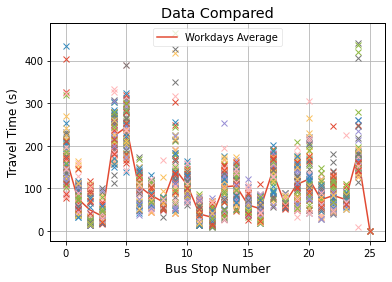

In [77]:
plt.plot(range(26), average1[0:26,0], label='Workdays Average')
for i in range(len(dataset1)//26):
    plt.plot(range(26), dataset1[i*26:i*26+26,10], 'x')

plt.title('Data Compared')
plt.xlabel('Bus Stop Number')
plt.ylabel('Travel Time (s)')
plt.legend() 

plt.savefig("Pictures/2605_AverageData&Workdays.svg", format="svg")
plt.show()

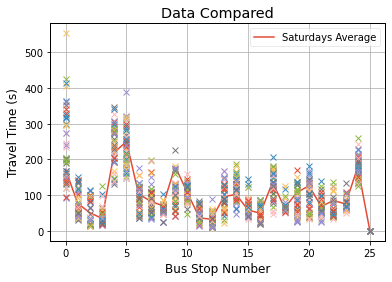

In [78]:
plt.plot(range(26), average2[0:26,0], label='Saturdays Average')
for i in range(len(dataset2)//26):
    plt.plot(range(26), dataset2[i*26:i*26+26,10], 'x')

plt.title('Data Compared')
plt.xlabel('Bus Stop Number')
plt.ylabel('Travel Time (s)')
plt.legend() 

plt.savefig("Pictures/2605_AverageData&Saturdays.svg", format="svg")
plt.show()

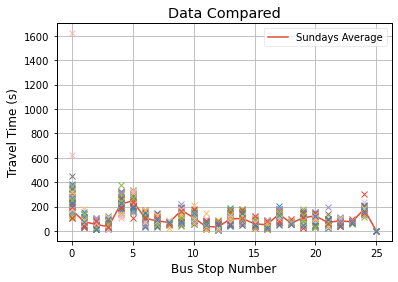

In [79]:
plt.plot(range(26), average3[0:26,0], label='Sundays Average')
for i in range(len(dataset3)//26):
    plt.plot(range(26), dataset3[i*26:i*26+26,10], 'x')

plt.title('Data Compared')
plt.xlabel('Bus Stop Number')
plt.ylabel('Travel Time (s)')
plt.legend() 

plt.savefig("Pictures/2605_AverageData&Sundays.svg", format="svg")
plt.show()

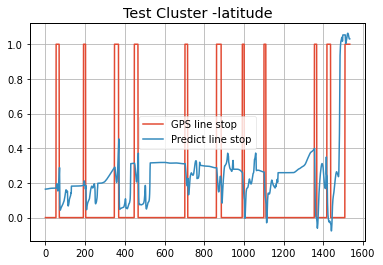

In [23]:
plt.plot(range(len(testY_reshaped_inv)), testY_reshaped_inv[:,2], label='GPS line stop')
plt.plot(range(len(testPredict_reshaped_inv)), testPredict_reshaped_inv[:,2], label='Predict line stop')
plt.title('Test Cluster -latitude')

plt.legend() 

# plt.savefig("C:/Users/Hailin/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/Conv-LSTM/ConvLSTM-verson04-lati.svg", format="svg")
plt.show()

In [80]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    return np.mean(np.abs((y_true - y_pred)/y_true))

error_lat = mean_absolute_percentage_error(testY_reshaped_inv[:,0], testPredict_reshaped_inv[:,0])
error_lon = mean_absolute_percentage_error(testY_reshaped_inv[:,1], testPredict_reshaped_inv[:,1])
print(error_lat)
print(error_lon)

7.499052e-06
2.9725527e-06


In [81]:
print(test.shape)
print(test[0])

(1561, 2)
[0.6107788  0.14379883]


In [82]:
start = 50
sheed = test[start:start+60]
print(sheed.shape)

(60, 2)


In [83]:
import numpy as np
sheed = np.reshape(sheed, (1, 60, 2))
prediction = sheed

for i in range(20):
    res = model.predict(sheed)
    sheed = np.concatenate((sheed[:, 15:, :], res), axis=1)
    prediction = np.concatenate((prediction, res), axis=1)

In [84]:
print(prediction.shape)

(1, 360, 2)


In [85]:
prediction = numpy.squeeze(prediction)
print(prediction.shape)
print(prediction[0])

(360, 2)
[0.60546875 0.17651367]


In [86]:
test_re2 = scaler.inverse_transform(test)
prediction_re2 = scaler.inverse_transform(prediction)
print(test[start])
print(prediction[0])

[0.60546875 0.17651367]
[0.60546875 0.17651367]


In [87]:
print(test_re2[start])
print(prediction_re2[0])
print(len(prediction_re2))

[ 35.44659 139.63794]
[ 35.44659 139.63794]
360


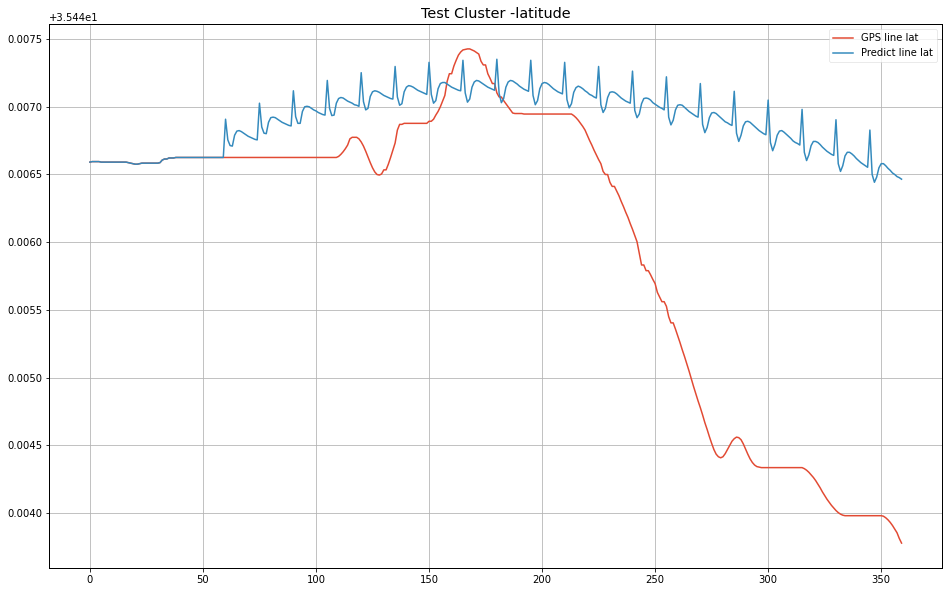

In [88]:
plt.plot(range(len(prediction_re2)), test_re2[start:start+len(prediction_re2),0], label='GPS line lat')
plt.plot(range(len(prediction_re2)), prediction_re2[:,0], label='Predict line lat')
plt.title('Test Cluster -latitude')

plt.legend() 

# plt.savefig("C:/Users/Hailin/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/Conv-LSTM/ConvLSTM-verson01-lati.svg", format="svg")
plt.show()

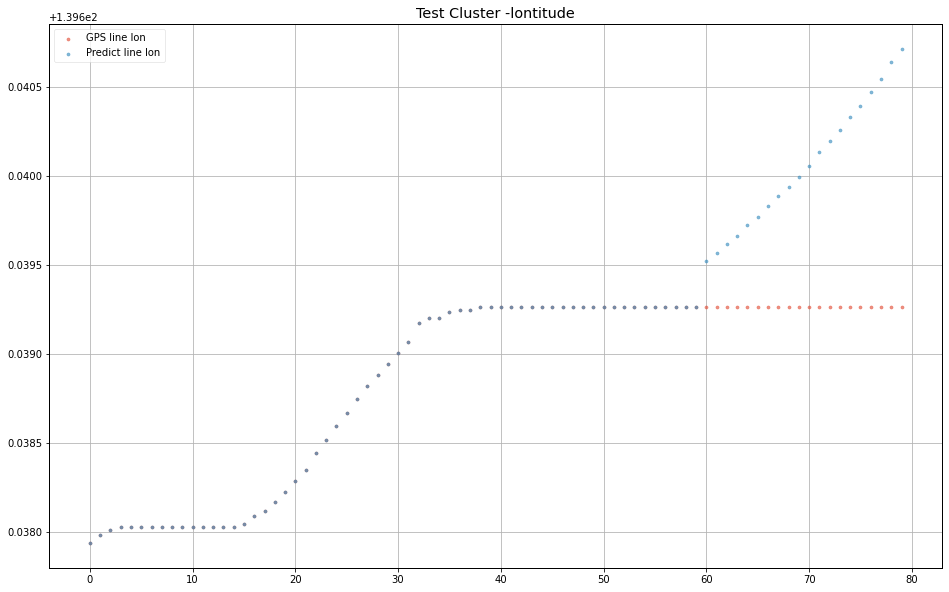

In [58]:
plt.scatter(range(len(prediction_re2)), test_re2[start:start+len(prediction_re2),1], label='GPS line lon', alpha=0.6, s=10)
plt.scatter(range(len(prediction_re2)), prediction_re2[:,1], label='Predict line lon', alpha=0.6, s=10)
plt.title('Test Cluster -lontitude')

plt.legend() 

# plt.savefig("C:/Users/Hailin/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/Conv-LSTM/ConvLSTM-verson01-lati.svg", format="svg")
plt.show()